In [13]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import pickle
from skimage.transform import rescale, rotate
import noise
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [15, 5]
import sys
sys.path.insert(1, os.getcwd()+"/../..") # Not needed if you installed SyMBac using pip
from SyMBac.drawing import raster_cell
from SyMBac.colony_simulation import ColonySimulation
from SyMBac.colony_renderer import ColonyRenderer, SimplifiedRenderer
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import convolve_rescale
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter

from skimage.exposure import rescale_intensity


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


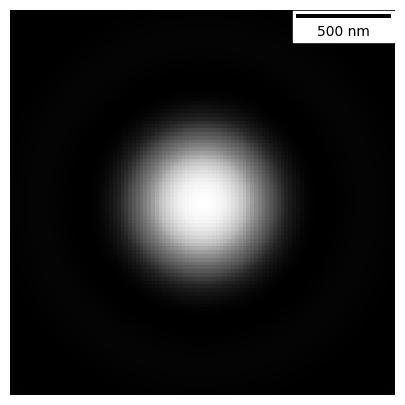

In [14]:
my_kernel = PSF_generator(
    radius = 50, 
    wavelength = 0.75, 
    NA = 1.0, 
    n = 1.4, 
    resize_amount = 1, 
    pix_mic_conv = 0.02, 
    apo_sigma = 8, 
    mode="simple fluo", 
    condenser = "Ph3",
    offset = 0
)
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

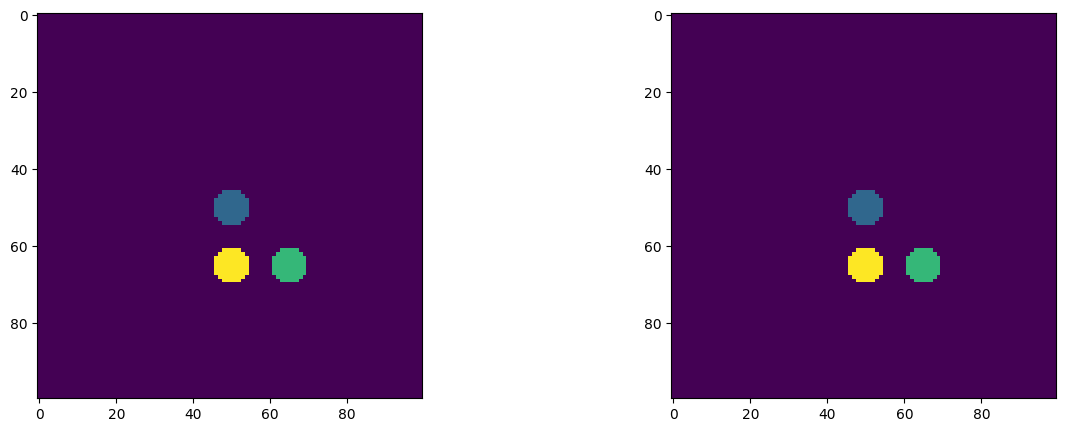

In [15]:
WIDTH = 100
HEIGHT = 100

original = np.zeros((WIDTH,HEIGHT))
mask = np.zeros((WIDTH,HEIGHT))

selectedPts = [[45,45],[60,60],[60,45]]
r = 5

for i,(x,y) in enumerate(selectedPts):
    #Draw a circle centred aobut the point
    for j in range(2*r):
        for k in range(2*r):
            if (j-r)**2 + (k-r)**2 < 25:
                original[x+j,y+k] = (i+1+5)/(len(selectedPts)+5)
                mask[x+j,y+k] = (i+1)/len(selectedPts)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(original)
axarr[1].imshow(mask)
plt.show()

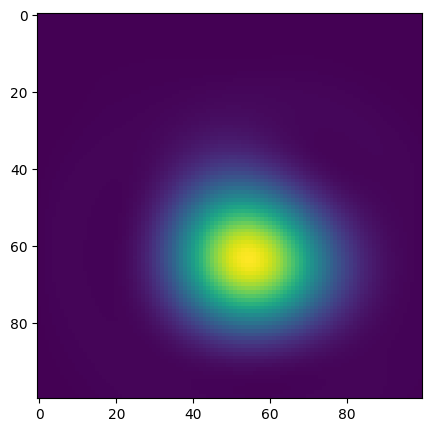

[[ 15  18  22 ...  23  22  18]
 [ 18  22  26 ...  28  26  22]
 [ 22  26  29 ...  32  29  26]
 ...
 [ 33  45  60 ... 531 492 452]
 [ 29  39  51 ... 497 459 419]
 [ 26  34  43 ... 461 423 384]]


In [16]:
my_renderer = SimplifiedRenderer(original,my_kernel)
output = my_renderer.render_scene()
plt.imshow(output)
plt.show()
print(output)


/home/boomalope/symbac/symbac/tests/dx_test_env/../../SyMBac/PSF.py:178: RuntimeWarning: invalid value encountered in divide
  PSF = (2 * jv(1, rr) / (rr)) ** 2


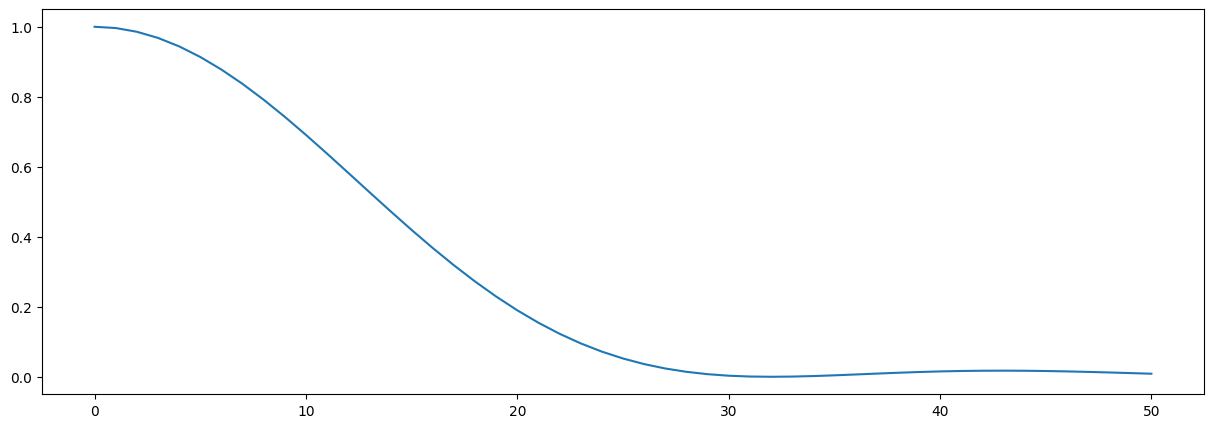

In [17]:
with open('ori.pkl', 'wb') as file: 
    pickle.dump(original, file)
with open('mask.pkl', 'wb') as file: 
    pickle.dump(mask, file)
with open('out.pkl', 'wb') as file: 
    pickle.dump(output, file)
psf = my_kernel.get_fluorescence_kernel(my_kernel.wavelength,my_kernel.NA,my_kernel.n,my_kernel.radius,my_kernel.scale)
size = psf.shape[1]
central_psf = psf[psf.shape[1]//2]
central_psf = central_psf[len(central_psf)//2:]
plt.plot(central_psf)
with open('psf.pkl', 'wb') as file: 
    pickle.dump(central_psf, file)

In [18]:
print(psf)

[[0.00414948 0.00415171 0.00409537 ... 0.00409537 0.00415171 0.00414948]
 [0.00415171 0.00409358 0.00397612 ... 0.00397612 0.00409358 0.00415171]
 [0.00409537 0.00397612 0.00379854 ... 0.00379854 0.00397612 0.00409537]
 ...
 [0.00409537 0.00397612 0.00379854 ... 0.00379854 0.00397612 0.00409537]
 [0.00415171 0.00409358 0.00397612 ... 0.00397612 0.00409358 0.00415171]
 [0.00414948 0.00415171 0.00409537 ... 0.00409537 0.00415171 0.00414948]]
